Found 2000 images belonging to 2 classes.
✅ Accuracy: 0.6

✅ Classification Report:
               precision    recall  f1-score   support

         Cat       0.60      0.66      0.63       103
         Dog       0.60      0.54      0.57        97

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



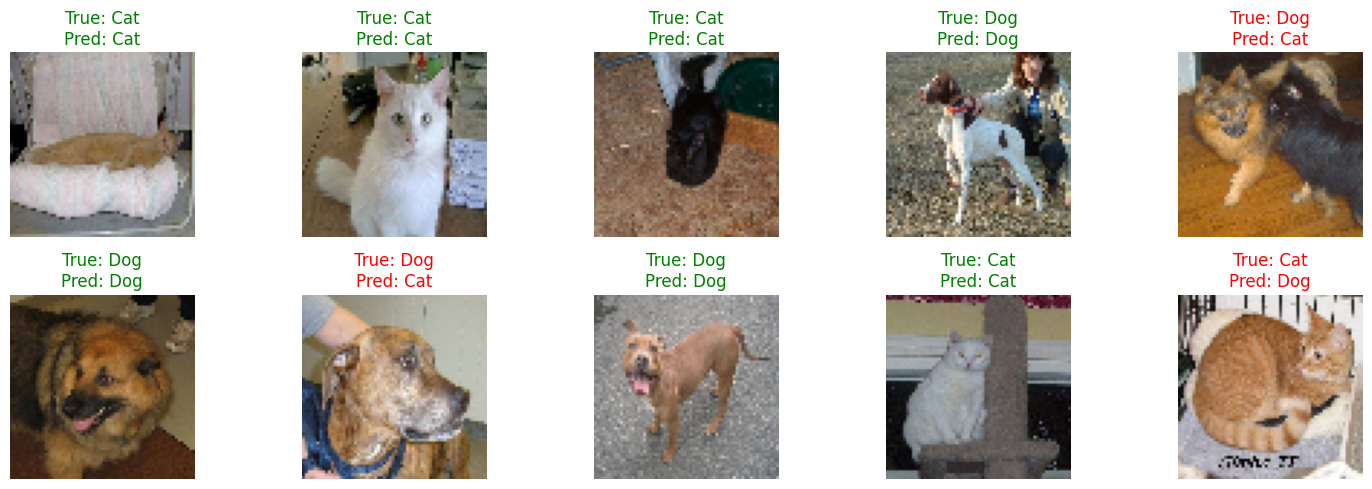

In [7]:
# ✅ STEP 1: Install TensorFlow
!pip install -q tensorflow

# ✅ STEP 2: Import Libraries
import tensorflow as tf
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ✅ STEP 3: Download & Extract Dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=dataset_url)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')

# ✅ STEP 4: Load Images Using ImageDataGenerator
IMG_SIZE = (64, 64)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=1000,  # Limit for SVM
    class_mode='binary',
    shuffle=True
)

# ✅ STEP 5: Load 1000 Images
X, y = next(train_data)  # Only one batch needed
X_flat = X.reshape(X.shape[0], -1)  # Flatten for SVM

# ✅ STEP 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# ✅ STEP 7: Train the SVM Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# ✅ STEP 8: Predict and Evaluate
y_pred = svm.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

# ✅ STEP 9: Visualize Predictions
def show_predictions(images, true_labels, predicted_labels, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        idx = np.random.randint(0, len(images))
        plt.subplot(2, n//2, i+1)
        plt.imshow(images[idx])
        true_name = "Dog" if true_labels[idx] == 1 else "Cat"
        pred_name = "Dog" if predicted_labels[idx] == 1 else "Cat"
        color = "green" if true_labels[idx] == predicted_labels[idx] else "red"
        plt.title(f"True: {true_name}\nPred: {pred_name}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Reshape test images back to (64, 64, 3) for visualization
X_test_images = X_test.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3)
show_predictions(X_test_images, y_test, y_pred, n=10)
